# COM6018 - Assignment 1

Student Username: ACP23SD

## Analysing Carbon Emissions Data

Before attempting the assignment make sure that you have read the accompanying assignment notes document carefully. This explains important details about what is expected and how you will be assessed.

## Loading the data

The data is being read from the file `owid-co2-data.csv` which you must download and store in the same directory as this notebook. Please leave the cell below unchanged. 

In [1]:
import pandas as pd

df = pd.read_csv('owid-co2-data.csv')

Add any further imports that your notebook needs in the cell below. If you are not using any then simply leave the cell blank. Remember, you are only allowed to use modules from the standard Python library, plus pandas, numpy, matplotlib and seaborn.

In [2]:
# SOLUTION
# Add any further imports that your notebook needs in this cell.

from matplotlib import pyplot as plt
import seaborn as ss

## Q1. The growth of CO<sub>2</sub> emissions

*How have CO<sub>2</sub> emissions grown over time?*

The dataset contains entries for countries grouped into four income groups: low, lower-middle, upper-middle and high. i) How have the total annual CO<sub>2</sub> emissions of each income group varied over the years 1950 to 2021? ii) How has the per capita CO<sub>2</sub> emissions (i.e., the emissions per person) of these groups varied over the same period. Comment on how the contribution of each income group is different when measured in terms of total emissions and per capita emissions.

(Add your solution below. Add further markdown and code cells as needed.)

In [3]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.

## Selecting relevant columns for the given question
df_co2 = df[['year','country','co2','co2_per_capita']]


## Removing rows with missing co2 and per capita co2 emisions
df_co2_cleaned = df_co2.dropna()

## Filtering data

## Filter by year - Select between 1950 and 2021
df_co2_filter = df_co2_cleaned[(df_co2_cleaned['year']>1950) & (df_co2_cleaned['year']<2021)]


## Filter by country - Select Income groups
income_groups = ['Lower-middle-income countries','Low-income countries','Upper-middle-income countries','High-income countries']
df_co2_filter = df_co2_filter[df_co2_filter['country'].isin(income_groups)]

## Aggregating data
df_co2_agg = df_co2_filter.groupby(['year','country'])['co2'].sum().unstack()
df_co2_per_capita_agg = df_co2_filter.groupby(['year','country'])['co2_per_capita'].sum().unstack()

## Plots

<Figure size 1000x1000 with 0 Axes>

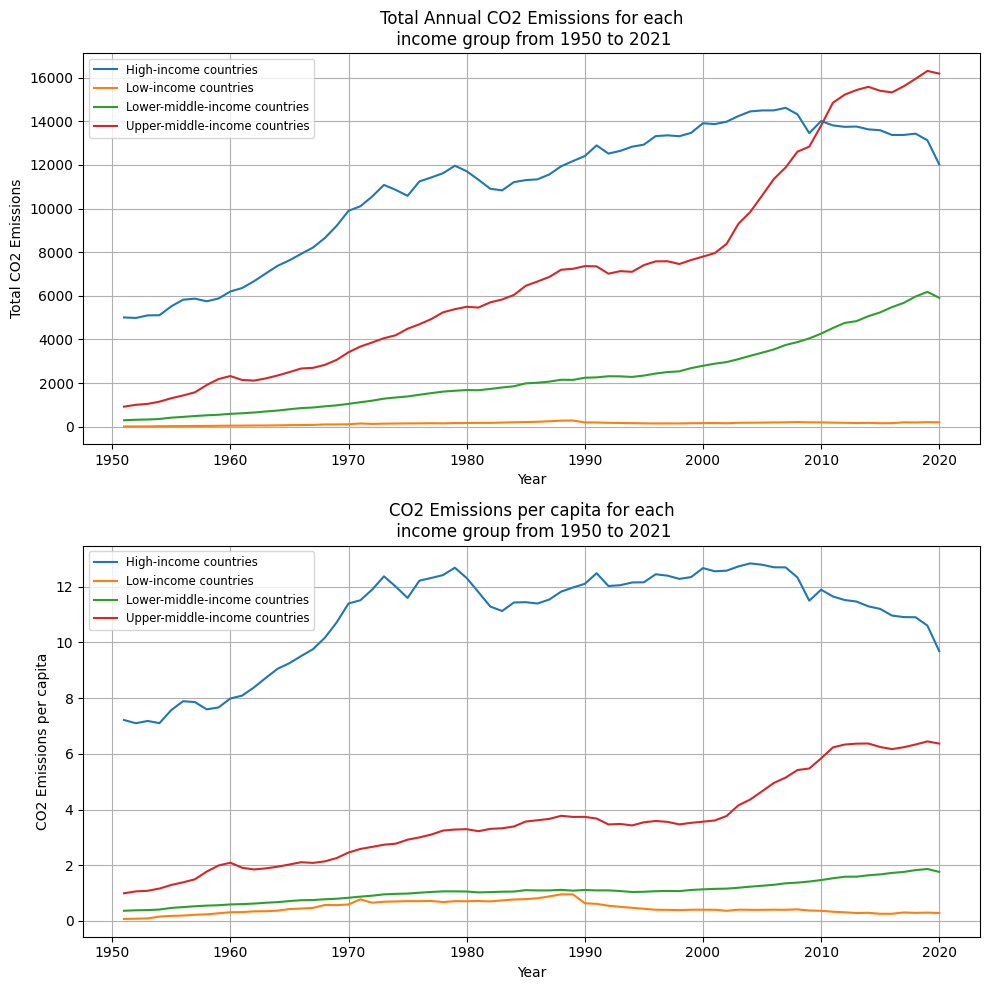

In [10]:
## Set figure size and subplots structure
plt.figure(figsize=(10,10))
fig,ax = plt.subplots(nrows=2,ncols = 1,figsize=(10,10))


## Plotting CO2 emissions for different income groups
df_co2_agg.plot(title='Total Annual CO2 Emissions for each\n income group from 1950 to 2021',
                xlabel='Year',ylabel='Total CO2 Emissions',
                grid=True,ax=ax[0]).legend(fontsize='small')


## Plotting CO2 emissions per capita for different income groups
df_co2_per_capita_agg.plot(title='CO2 Emissions per capita for each\n income group from 1950 to 2021',
                           xlabel='Year',ylabel='CO2 Emissions per capita',
                           grid=True,ax=ax[1]).legend(fontsize='small')

## Show plot
plt.tight_layout()
plt.show()

## Text - Comments - Question 1

### CO2 emissions

There has been a consistent rise in the total annual CO2 emissions from 1950 to 2020 by the upper, lower-middle, and upper-middle income countries. It is noteworthy that the rate of change of the annual CO2 emissions for low-income countries is relatively insignificant and stands the lowest compared to the other income groups. The slope of the curve for the upper-middle income groups has doubled after the year 2000 leading to a cross over the high-income countries. Although CO2 emissions from high-income countries exhibit high variance over the years, they continue to outpace other income groups by a significant margin.

### CO2 emissions per capita

The CO2 emissions per capita for the income groups have stayed stable until 2000 for the low, lower-middle, and upper-middle income groups. Post 2000, there has been a steady increase in the CO2 emissions for the upper-middle income countries with the lower and lower-middle continuing with stagnant emissions over this time period. High-income countries have consistently remained at a higher level in CO2 emissions per capita with a high margin from 1950. Following a gradual increase in the 1960-1970 decade, the CO2 emissions per capita have had a significant variance since 2020.


### Difference in plots

A clear conclusion by comparing the plots is the margin between the high-income countries and the rest of the countries with the CO2 emissions per capita projecting a high disparity. In the case of upper-middle income countries, the trend of CO2 emissions crossing the high-income countries in absolute terms has shifted in the CO2 emissions per capita scenario.

## Q2. The share of CO2 emissions by country over time.

*Which countries have the highest CO<sub>2</sub> emissions?*

Compare the share of global carbon emissions for the top 5 emitting countries as a proportion of the total world emissions. Make separate plots for the years 1960, 1990 and 2020. Make a similar set of plots but normalised in a way that accounts for the population of each country. Note, all the plots should appear in the same figure.

Comment on how the top 5 emitting countries have changed over time and how the top 5 emitting countries change when you normalise for population.

(Add your solution below. Add further markdown and code cells as needed.)

In [12]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.

## Selecting relevant columns for the given question
df_co2_glob = df[['year','country','co2','share_global_co2','population','iso_code']]

## List of years
years = [1960,1990,2020]

## List Initialization for top 5 co2 plots
df_co2_top5 = []
df_co2_per_capita_top5 = []

## Calculating world population for the list of years - Converted to list
world_population = df_co2_glob[(df_co2_glob['country']=='World') & (df_co2_glob['year'].isin(years))]['population'].tolist()


## Removing NA values - Removing regions, continents using the iso code column
df_co2_glob = df_co2_glob.dropna()

## Creating 'global co2 emissions per capita percentage' = global co2 percentage * country population/ world population - All calculated for the defined list of years
## Calculating top 5 countries using nlargest
for i in range(0,len(years)):
        df_co2_years = df_co2_glob[df_co2_glob['year']==years[i]].copy()
        df_co2_years.loc[:,'co2_per_capita'] = (df_co2_years['share_global_co2']*df_co2_years['population']/world_population[i])
        df_co2_top5.append(df_co2_years.nlargest(5,'share_global_co2'))
        df_co2_per_capita_top5.append(df_co2_years.nlargest(5,'co2_per_capita'))

## Plots

<Figure size 1500x500 with 0 Axes>

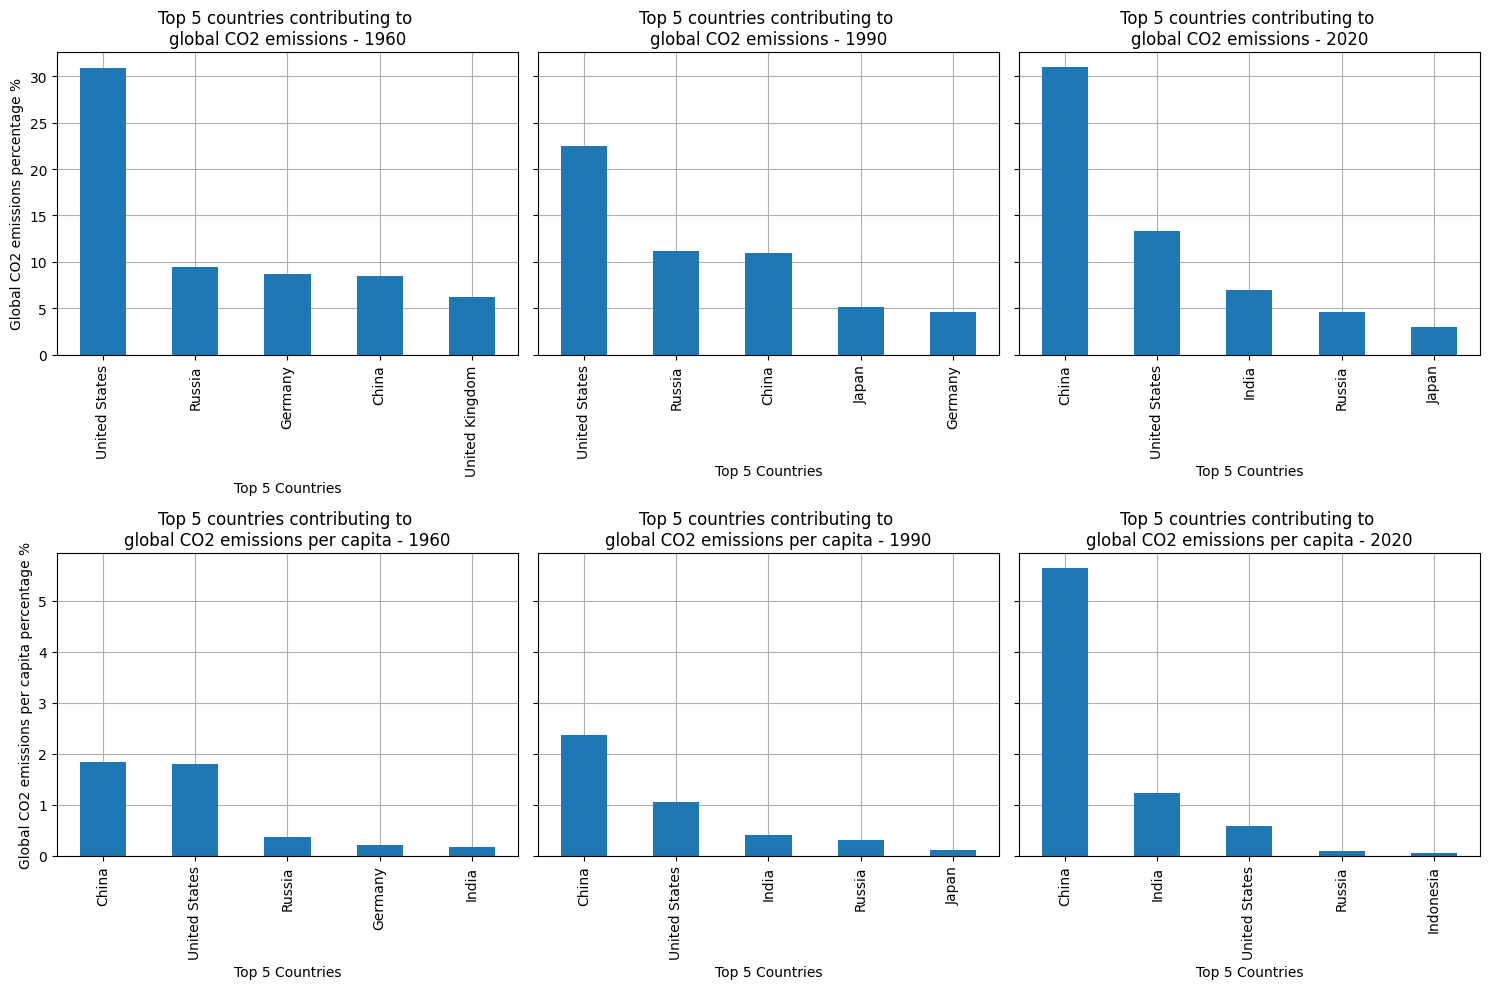

In [15]:
## Set figure size and subplots structure
plt.figure(figsize=[15,5])
fig,ax = plt.subplots(nrows=2,ncols=3,figsize = [15,10],sharey='row')

### Top 5 Countries for global CO2 Emissions

## Year - 1960
df_co2_top5[0].plot(kind='bar',stacked=True,grid = True,ax=ax[0,0],legend=False,zorder=2,
                    y='share_global_co2',x='country',
                    title = 'Top 5 countries contributing to \nglobal CO2 emissions - 1960',
                    ylabel = 'Global CO2 emissions percentage %',
                    xlabel = 'Top 5 Countries')


## Year - 1990
df_co2_top5[1].plot(kind='bar',stacked=True,grid = True,ax=ax[0,1],legend=False,zorder = 2,
                    y='share_global_co2',x='country',
                    title = 'Top 5 countries contributing to \nglobal CO2 emissions - 1990',
                    ylabel = 'Global CO2 emissions percentage %',
                    xlabel = 'Top 5 Countries')


## Year - 2020
df_co2_top5[2].plot(kind='bar',stacked=True,grid = True,ax=ax[0,2],legend=False,zorder=2,
                    y='share_global_co2',x='country',
                    title = 'Top 5 countries contributing to \nglobal CO2 emissions - 2020',
                    ylabel = 'Global CO2 emissions percentage %',
                    xlabel = 'Top 5 Countries')


### Top 5 Countries for global CO2 smissions per capita


### Year - 1960
df_co2_per_capita_top5[0].plot(kind='bar',stacked=True,grid = True,ax=ax[1,0],legend=False,zorder=2,
                               y='co2_per_capita',x='country',
                               title = 'Top 5 countries contributing to \nglobal CO2 emissions per capita - 1960',
                               ylabel = 'Global CO2 emissions per capita percentage %',
                               xlabel = 'Top 5 Countries')


### Year - 1990
df_co2_per_capita_top5[1].plot(kind='bar',stacked=True,grid = True,ax=ax[1,1],legend=False,zorder=2,
                               y='co2_per_capita',x='country',
                               title = 'Top 5 countries contributing to \nglobal CO2 emissions per capita - 1990',
                               ylabel = 'Global CO2 emissions per capita percentage %',
                               xlabel = 'Top 5 Countries')

### Year - 2020
df_co2_per_capita_top5[2].plot(kind='bar',stacked=True,grid=True,ax=ax[1,2],legend=False,zorder=2,
                               y='co2_per_capita',x='country',
                               title = 'Top 5 countries contributing to \nglobal CO2 emissions per capita - 2020',
                               ylabel = 'Global CO2 emissions per capita percentage %',
                               xlabel = 'Top 5 Countries')

## Show plot
plt.tight_layout()
plt.show()

## Text - Comments - Question 2

### Global CO2 emissions percentage

A noteworthy observation over the years is that the country with the highest CO2 emissions has a significant lead compared to the country with the second highest carbon emissions. Examining the data between the years 1960 and 1990, the United States has dominated the other countries. Russia, Germany, and China consistently hold a share of the global emissions between the years 1960 and 1990. However, by the year 2020, there has been a shift in the rankings with China taking the lead by a substantial margin with India entering the top 5 countries with 5% contribution.


### Global CO2 emissions per capita percentage

In the scenario of the top 5 countries for global CO2 emissions per capita, it is evident that China has been leading the table throughout the timeline while the United States has been gradually reducing its carbon emissions. Notably, China not only leads the charts but has seen a steady rise in the overall percentage. Accounting for the population, India has also been a significant contributor to global emissions from 1960 to 2020 with a steady upward trend. Russia appears to have maintained its share of emissions over time, while other countries like Japan, Germany, and Indonesia make an appearance in the top 5 countries with a global share of emissions in different years.

## Q3. The link between GDP and CO<sub>2</sub> emissions

*Do countries with high GDP always have high per capita CO<sub>2</sub> emissions.* 

Plot the per capita CO<sub>2</sub> emissions against the GDP per capita for each country. Design your plot so that the size of the marker is proportional to the population of the country. Only consider countries with a population of at leat 5 million people. 

Compare these plots for the year 1978, 1998 and 2018.  Comment on the relationship between the two variables and how it has changed over time.

(Add your solution below. Add further markdown and code cells as needed.)

In [16]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.


## Selecting relevant columns for the given question
df_co2_q3 = df[['year','co2_per_capita','gdp','population']]

## Removing Null values
df_co2_cleaned = df_co2_q3.dropna()

## List of years
years = [1978,1998,2018]

## List Initialization for year plots
df_co2_years = []

## Minimum population threshold for countries
population_thresh = 5000000

## New column for GDP per capita by dividing GDP with population
df_co2_gdp_per_capita = df_co2_cleaned.copy()
df_co2_gdp_per_capita.loc[:,'gdp_per_capita'] = log(df_co2_gdp_per_capita['gdp']/df_co2_gdp_per_capita['population'])

## Applying threshold of population
df_co2_thresh = df_co2_gdp_per_capita[df_co2_gdp_per_capita['population']>population_thresh]

## Filtering years
for year in years:
    df_co2_years.append(df_co2_thresh[df_co2_thresh['year']==year])

## Plot

<AxesSubplot: title={'center': '2018'}, xlabel='GDP per capita', ylabel='CO2 per capita'>

<Figure size 1000x1500 with 0 Axes>

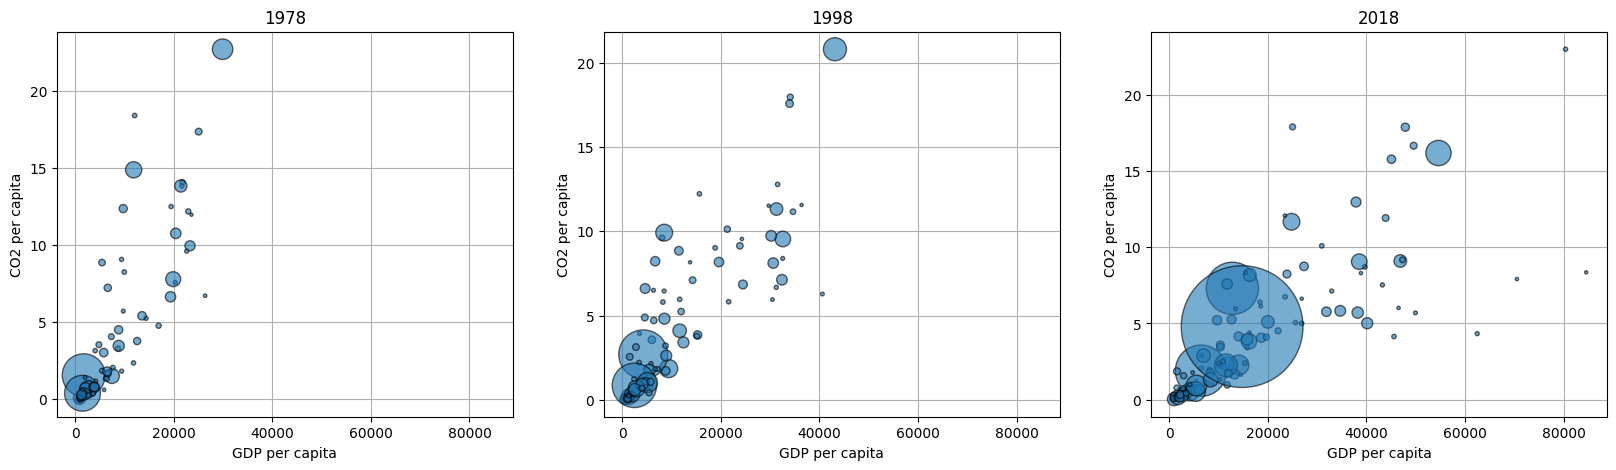

In [23]:
## Set figure size and subplots structure
plt.figure(figsize=[10,15])
fig,ax = plt.subplots(ncols=3,nrows=1,figsize=[20,5],sharex=True)

## Point scaling factor
scatter_scale = 1e-6

### GDP per capita  vs CO2 per capita 

## Year - 1978
df_co2_years[0].plot(y='co2_per_capita',x='gdp_per_capita',edgecolor = 'black',grid = True,zorder=2,alpha = 0.6,
                     kind='scatter',s=df_co2_years[0]['population']*scatter_scale,ax=ax[0],
                     title='1978',ylabel = 'CO2 per capita',xlabel = 'GDP per capita')

## Year - 1998
df_co2_years[1].plot(y='co2_per_capita',x='gdp_per_capita',edgecolor = 'black',grid = True,zorder=2,alpha = 0.6,
                     kind='scatter',s=df_co2_years[1]['population']*scatter_scale,ax=ax[1],
                     title='1998',ylabel = 'CO2 per capita',xlabel = 'GDP per capita')

## Year - 2018
df_co2_years[2].plot(y='co2_per_capita',x='gdp_per_capita',edgecolor = 'black',grid = True,zorder=2,alpha = 0.6,
                     kind='scatter',s=df_co2_years[2]['population']*scatter_scale,ax=ax[2],
                     title='2018',ylabel = 'CO2 per capita',xlabel = 'GDP per capita')

## Text - Comment - Question 3

A salient inference from the comparison of GDP per capita and CO2 per capita is their strong positive correlation through the years with the slope of their dependancy increasing over time. Notably, in the first time period of 1978, a majority of the countries have exhibited carbon dioxide emissions per capita under 5% corresponding to a modest GDP per capita of under 5000. As subsequent years unfold, the rate of CO2 per capita increases as the GDP per capita increases. A crucial inference to understand from the correlation is that countries with a high GDP per capita have higher CO2 emissions per capita. Moreover, the plots highlight the consistent rise in population across countries. Another crucial observation is that the rate of increase of GDP has been higher in comparison with CO2 emissions. It is essential to observe the population dynamics for a better understanding of the relationship between CO2 emissions and GDP.

## Q4. The development of wealth inequality over time.

*Has the distribution of wealth across countries become more or less equal over time?*

Make a plot that compares the distribution of GDP per capita across the countries in the world and 10-yearly intervals from 1950 to 2020.  Comment on how the distribution has changed over time.

(Add your solution below. Add further markdown and code cells as needed.)

In [9]:
# ADD SOLUTION HERE. ADD AS MANY CELLS AS YOU NEED.

## Selecting relevant columns for the given question
df_co2_wealth = df[['year','gdp','population','iso_code']]

## Dropping Null values - Used iso code column to have only countries
df_co2_wealth = df_co2_wealth.dropna()

## Year interval
year_interval = 10
year_list = [i for i in range(1950,2020,year_interval)]

## Filtering years
df_co2_wealth = df_co2_wealth[df_co2_wealth['year'].isin(year_list)]

## Calculating GDP per capita column by dividing GDP and population
df_co2_wealth['gdp_per_capita'] = df_co2_wealth['gdp']/df_co2_wealth['population']

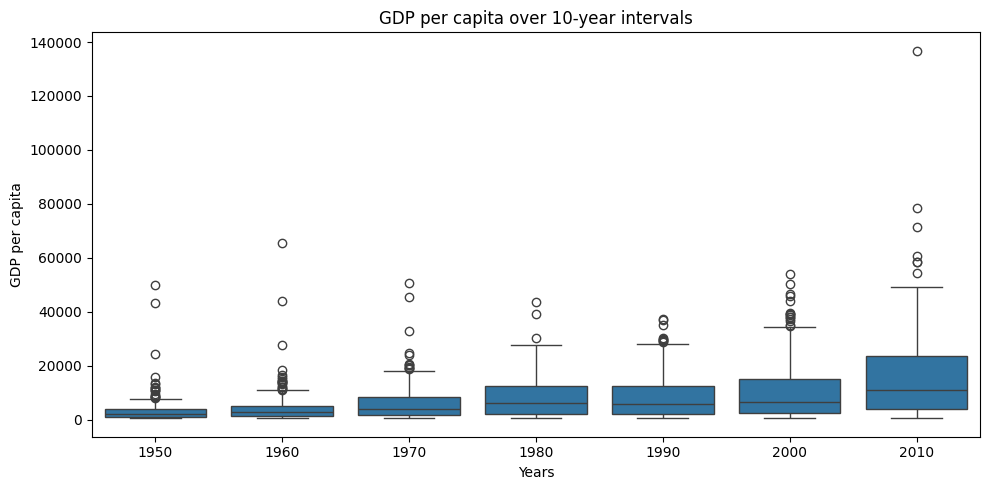

In [10]:
## Set figure size and subplots structure
plt.figure(figsize=(10, 5))

## Box plot comprising of GDP per capita for every decade
ss.boxplot(data=df_co2_wealth, x='year', y='gdp_per_capita').set(xlabel = 'Years', ylabel = 'GDP per capita',title = 'GDP per capita over 10-year intervals')

## Show plot
plt.tight_layout()
plt.show()

## Text - Comments - Question 4

From the box plots over the years, it can be inferred from the increase in the median line that there has been a steady increase in overall wealth over time. There has been consistent presence of outliers all over the timeline with an anomaly in 1980. These outliers indicate that there is a group of countries that do not conform to the conventional upward trajectory of wealth. A crucial inference to make is the skewness over the years. The right whisker has been longer than the left counterpart consistently indicating a right skewed distribution of wealth. With an increase in the right whisker every decade, it is noteworthy that the inequality in the distribution of wealth has increased over time. From the gradual increase in the upper quartile and stagnancy in the lower quartile across each decade, it can be inferred that the poorer countries stay poor and the wealthier countries get more wealthy.

## Reminder

Before submitting your notebook make sure that it runs correctly from the beginning by selecting "Restart and run all" from the Kernel menu. Make sure that you save your notebook using the name `COM6018-assignment1-<your-student-username>.ipynb`. For example, if your username is 'ac1jpb' then your notebook should be named `COM6018-assignment1-ac1jpb.ipynb`. To submit, follow the instruction in the accompanying assignment instructions document. For late submission, unless there are extenuating circumstances, standard lateness penalties will be applied.